# Machine Learning Exploration

### Author: Brandon Jean-Baptiste
## Project Overview

This project focuses on exploring linear regression techniques to predict temperature trends and apply these skills on a bonus dataset. We'll cover:
- Part 1: Charting a Straight Line
- Part 2: Temperature Prediction in NYC (SciPy)
- Part 3: Temperature Prediction in NYC (scikit-learn)
- Part 4: Insights
- Part 5: Bonus - California Housing Dataset

We will use both SciPy and scikit-learn libraries for linear regression, visualizing data trends, and making predictions.



## Part 1 - Chart a Straight Line

In this part, we will chart a straight line representing the relationship between Celsius and Fahrenheit temperatures using the formula:

\[
\text{Fahrenheit} = \frac{9}{5} \times \text{Celsius} + 32
\]

We’ll plot this linear relationship to visualize how temperature scales correlate.


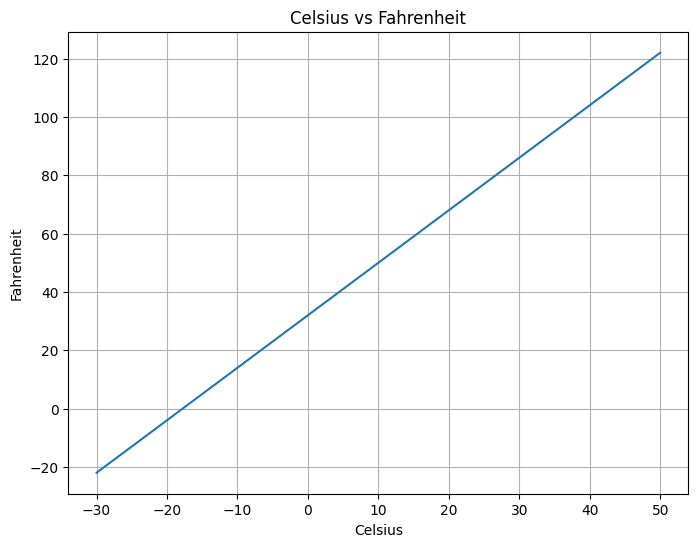

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Celsius to Fahrenheit calculation
celsius = pd.Series(range(-30, 51))  # Define Celsius values from -30 to 50
fahrenheit = 9/5 * celsius + 32      # Convert to Fahrenheit

# Create a DataFrame
temp_df = pd.DataFrame({"Celsius": celsius, "Fahrenheit": fahrenheit})
temp_df.head()

# Plot Celsius vs Fahrenheit
plt.figure(figsize=(8, 6))
sns.lineplot(x="Celsius", y="Fahrenheit", data=temp_df)
plt.title("Celsius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.grid(True)
plt.show()


## Part 2 - Prediction

We’ll use historical data on average high temperatures in NYC during January to build a linear regression model with SciPy’s `linregress`. This model will help predict future temperatures.


### Section 1 - Data Acquisition

Loading the NYC January average high temperature data from a CSV file.


In [14]:
nyc_df = pd.read_csv("nyc_jan_temps.csv")
nyc_df.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

Inspecting the first and last few rows of the dataset.


In [15]:
# Inspect first and last rows
nyc_df.head()
nyc_df.tail()


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Renaming columns for readability and setting display precision.


In [25]:
# Rename columns to keep "Date" as the first column
nyc_df.columns = ["Date", "AvgHighTemp", "Anomaly"]

# Convert Date column from YYYYMM to YYYY by integer division
nyc_df["Date"] = nyc_df["Date"].floordiv(100)

# Set display precision for more readable output
pd.set_option('display.precision', 2)

# Check the cleaned data
nyc_df.head()


,Date,AvgHighTemp,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

Calculating basic descriptive statistics to understand the dataset better.


In [26]:
# Set display precision for AvgHighTemp
pd.set_option('display.precision', 2)
nyc_df["AvgHighTemp"].describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: AvgHighTemp, dtype: float64

### Section 5 - Build the Model

Using SciPy’s `linregress` to calculate the slope and intercept for the line of best fit.


In [29]:
from scipy.stats import linregress

# Ensure 'Date' and 'AvgHighTemp' columns are correctly set up
slope, intercept, r_value, p_value, std_err = linregress(nyc_df["Date"], nyc_df["AvgHighTemp"])

print(f"Slope: {slope}, Intercept: {intercept}")


Slope: 0.014771361132966163, Intercept: 8.694993233674289


### Section 6 - Predict

Using the model to predict the average high temperature in January for 2024.


In [30]:
# Predict for the year 2024
predicted_temp_2024 = slope * 2024 + intercept
print(f"Predicted average temperature in 2024: {predicted_temp_2024}")

# Predict for the year 1890
predicted_temp_1890 = slope * 1890 + intercept
print(f"Predicted average temperature in 1890: {predicted_temp_1890}")


Predicted average temperature in 2024: 38.5922281667978
Predicted average temperature in 1890: 36.612865774980335
